# Computational Model of Spatial Auditory Attention

Import libraries and experimental data.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from math import exp, fabs

## Attentional Bias

We represent attentional bias as a number between 0-1. This value is calculated directly from the experimental data by inverting and normalizing (on a scale from 0-2000ms) the experimental RT values.

In [2]:
def attentional_bias(expRTs):
    bias = []
    for rt in expRTs:
        bias.append((2000 - rt)/2000)
    
    return bias


#TODO: Add mean RT values from experimental data at each of the five locations
expRTs = []

# convert RT into attentional bias
experimental = attentional_bias(expRTs)

## Attentional Gradients

We hypothesize that attention can be modeled as a combination of spatial gradients, representing top down and bottom up attention. Top down attention is represented by a 1-dimensional vector called a goal map. Bottom up attention is represented as a 1-dimensional vector called a saliency map. Together these combine to create a total attentional gradient over space, represented as attentional bias (between 0-1). 

Several different possible shapes were tested as possible representations of the goal map and saliency map.

### Goal Maps

#### Standard

Top-down attentional bias is represented as a gaussian curve.

In [3]:
def standard_goal_map(x,attended_location,sd,mag):

    # standard gaussian equation
    return mag * (exp((-fabs(attended_location-x) ** 2.0)/(2.0 * sd ** 2.0)))

#### Facilitation and Inhibition

In [4]:
def fac_and_inhib_goal_map(x,attended_location,sd,mag):
    
    #TODO: Fill this in
    return 0

#### Constant

In [5]:
def constant_goal_map(value):
    return value

### Saliency Maps 

#### Standard

Bottom up attentional bias is represented as an inverted gaussian curve.

In [6]:
def standard_saliency_map(x,attended_location,sd,mag):
    
    # inverted gaussian equation
    return mag - mag*(exp((-fabs(attended_location-x) ** 2.0)/(2.0 * sd ** 2.0)))

#### Constant

In [7]:
def constant_saliency_map(value):
    
    #returns a constant value
    return value

### Priority Maps

Two types of priority maps were tested. The first adds the goal map and saliency map together. The second applies weights (between 0-1) to the goal map and saliency map before adding them together.

#### Additive

In [8]:
def additive_priority_map(gm,sm):
    return gm + sm

#### Weighted

In [9]:
def weighted_priority_map(gm_weight,gm,sm_weight,sm):
    return gm_weight * gm + sm_weight * sm

## Model Plotting

Each model is plotted showing the goal map, saliency and priority map, given the model parameters. The attentional bias of the experimental data is also plotted.

In [10]:
def model_plot(gm,sm,pm,experimental):
    
    #initialize an array of the degrees we are modeling (-90,90)
    degrees = np.arange(-90,90)
    
    #TODO: plot experimental data
    
    plt.plot(degrees,gm)
    plt.plot(degrees,sm)
    plt.plot(degrees,pm)
    plt.scatter([-90,-45,0,44,89],experimental)
    plt.ylim((0,1))
    plt.xlim((-90,90))
    plt.show()

## Model Error Calculation

The error is calculated using the sum of squared errors between the attentional bias of the behavioral data and the model at each of the five standard locations.

In [11]:
def model_error(pm,experimental):
    
    error = 0
    error = error + (experimental[0] - pm[0]) ** 2
    error = error + (experimental[1] - pm[44]) ** 2
    error = error + (experimental[2] - pm[89]) ** 2
    error = error + (experimental[3] - pm[134]) ** 2
    error = error + (experimental[4] - pm[179]) ** 2
        
    return error

## Model Testing

Using different combinations of the above goal, saliency and priority map functions, we tested several different versions of the model against the attentional bias of the experimental data and compared error values.

In [12]:

experimental = {
    '-90':[0.75672619,0.72839881,0.727428571,0.734345238,0.748416667],
    '0':[0.741428571,0.731446429,0.755886905,0.731505952,0.743827381],
    '90':[0.746065476,0.735571429,0.742190476,0.737946429,0.750160714]}

### Stochastic Local Search

Parameters for each model were found by running a stochastic local search to find parameters that minimized the error between the model and the experimental data.

In [13]:
def local_search(gm_mag, sm_mag, gm_sd, sm_sd,current_fit, best_fit):
    #TODO: Fill in stochastic local search
    
    # generate neighborhood from starting parameters. Each neighbor in neighborhood differs in 1 parameter by each step within 
    # 10% of current parameter value
    
    #
    # choose parameters that generate most improved fit
    #
    # if nothing improved for < 100 iterations, choose random neighbor as new parameter set and try again
    #
    # if nothing improved for 100 iterations, random restart to parameter set within 50% of current parameter values
    return 0

### GLFree Model

The standard goal map and standard saliency map are combined using the additive priority map. The standard deviations and magnitudes of the gaussian functions used in each map are learned using stochastic local search.

In [14]:
def glfree_model(attended_location,gm_sd,gm_mag,sm_sd,sm_mag,experimental):

    #initialize goal map and saliency map each to a 1-dimentional array of size 180.
    gm = np.zeros(180)
    sm = np.zeros(180)

    #initialize an array of the degrees we are modeling (-90,90)
    degrees = np.arange(-90,90)

    for i in range(len(degrees)):
        gm[i] = standard_goal_map(degrees[i],attended_location,gm_sd,gm_mag)
        sm[i] = standard_saliency_map(degrees[i],attended_location,sm_sd,sm_mag)

    pm = additive_priority_map(gm,sm)
    
    model_plot(gm,sm,pm,experimental)
    
    print("Error: " + str(model_error(pm,experimental)))

### Results

The parameters below were learned using a stochastic local search.

#### Standard Location: 0

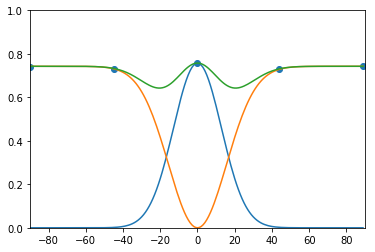

Error: 1.283179399e-05


In [15]:
# attended location
attended_location = 0
    
# parameters
gm_sd = 12.8800
gm_mag = 0.7576
sm_sd = 15.6139
sm_mag = 0.7428

glfree_model(attended_location, gm_sd, gm_mag, sm_sd, sm_mag,experimental['0'])


#### Standard Location: 90

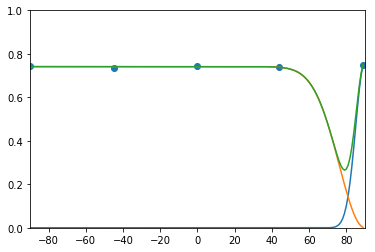

Error: 5.64713098851e-05


In [16]:
# attended location
attended_location = 90
    
# parameters
gm_sd = 4.9600
gm_mag = 0.7639
sm_sd = 13.8700
sm_mag = 0.7412


glfree_model(attended_location, gm_sd, gm_mag, sm_sd, sm_mag,experimental['90'])

#### Standard Location: -90

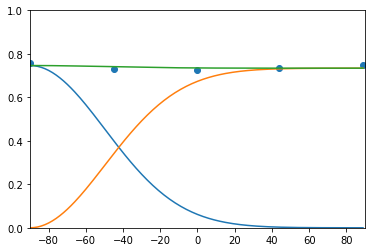

Error: 0.000527729784302


In [17]:
# attended location
attended_location = -90
    
# parameters
gm_sd = 40.2779
gm_mag = 0.7463
sm_sd = 40.2779
sm_mag = 0.7341

glfree_model(attended_location, gm_sd, gm_mag, sm_sd, sm_mag,experimental['-90'])